In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure
from skimage.filters import frangi

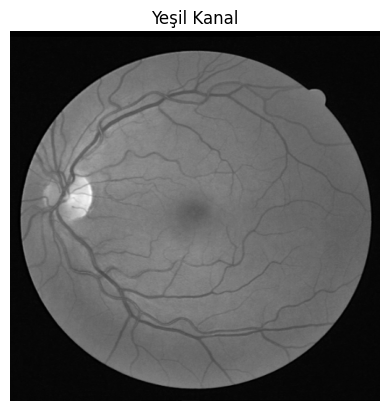

In [24]:
# Retina görüntüsünü yükle
retina_image = cv2.imread(r"..\sample\image.png")

#yeşil kanalı al
green_channel = retina_image[:, :, 1]

plt.imshow(green_channel , cmap='gray')
plt.title("Yeşil Kanal")
plt.axis('off')
plt.show()

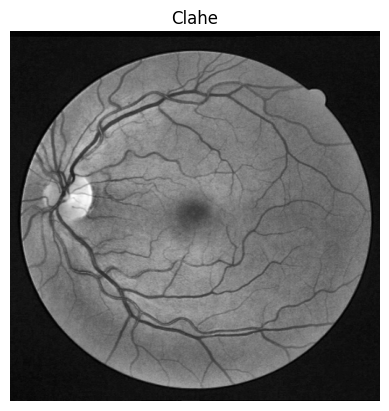

In [25]:
# Kontrast iyileştirme için CLAHE uygulayın
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_green = clahe.apply(green_channel)

plt.imshow(enhanced_green , cmap='gray')
plt.title("Clahe")
plt.axis('off')
plt.show()

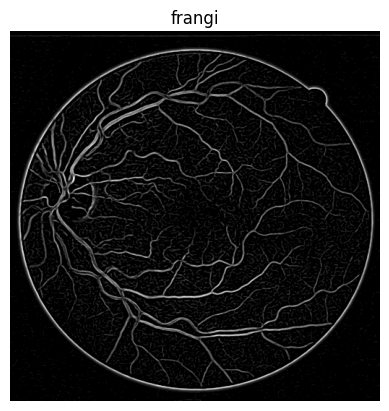

In [26]:
# Frangi filtresini kullanarak damarları vurgulayın
sigmas = np.arange(1, 5.5, 0.5)
frangi_filtered = frangi(enhanced_green, sigmas=sigmas)

# Frangi çıktısını 8 bit görüntüye yeniden ölçeklendirin
frangi_filtered = exposure.rescale_intensity(frangi_filtered, out_range=(0, 255)).astype(np.uint8)

# Gama ayarıyla damar parlaklığını artırın
gamma_corrected = exposure.adjust_gamma(frangi_filtered, gamma=0.5)

plt.imshow(gamma_corrected , cmap='gray')
plt.title("frangi")
plt.axis('off')
plt.show()

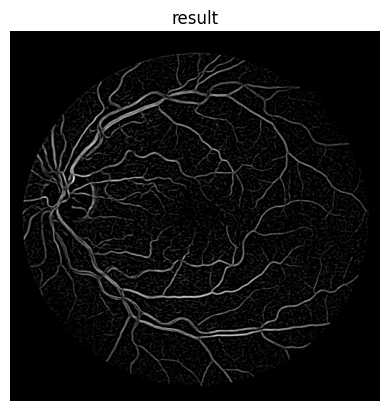

In [27]:
def get_edges(img):
    ret,thresh1=cv2.threshold(img,25,255,cv2.THRESH_BINARY )
    edge=cv2.Canny(thresh1, 50, 150)
    kernel = np.ones((7,7), np.uint8)
    edge= cv2.dilate(edge, kernel, iterations=1)
    edge=cv2.add(edge,255-thresh1)
    return edge

son = cv2.subtract(gamma_corrected ,get_edges(green_channel))

plt.imshow(son , cmap='gray')
plt.title("result")
plt.axis('off')
plt.show()

0.3621551162285466


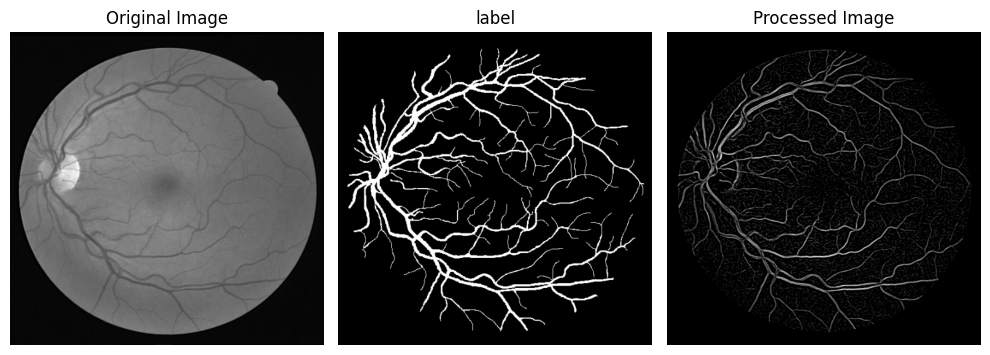

In [28]:
def calculate_iou(pred, label):
    intersection = np.logical_and(pred, label).sum()
    union = np.logical_or(pred, label).sum()
    return intersection / union if union != 0 else 0

label= cv2.imread(r"..\sample\label.png")
label=label[:, :, 1]
print(calculate_iou(son, label))

# Visualizing the result
plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.imshow(green_channel, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(label, cmap='gray')
plt.title("label")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(son, cmap='gray')
plt.title("Processed Image")
plt.axis('off')

plt.tight_layout()
plt.show()